In [1]:
### Import Google Drive:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
### Imports:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
### CONSTANTS:
CSV_PATH = "/content/gdrive/MyDrive/Data_Mining/"
CLASSES = {0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal', \
                6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote', \
                12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat',\
                18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}

In [4]:
### CSV files:

# Important features:
# 1) file_name
# 2) id
# 3) seq_id
# 4) seq_num_frames
# 5) frame_num
# 6) date_captured (%d-%m-%Y %H:%M:%S)
# 7) location 
# 8) category_id (only for the training set)

orgTrainData = pd.read_csv(CSV_PATH + "train.csv")
orgTrainData = orgTrainData[orgTrainData.category_id != 0]

trainClasses = orgTrainData["category_id"].unique()
print(len(trainClasses))
encoder = dict([(i, j) for i, j in zip(trainClasses, range(len(trainClasses)))])
decoder = dict([(v, k) for k, v in encoder.items()])

def encoding(labels):
        return encoder[int(labels)]

orgTrainData['category_id'] = orgTrainData['category_id'].apply(encoding)

trainData = orgTrainData[["file_name", "id", "seq_id",
                          "seq_num_frames", "frame_num", "date_captured",
                          "location", "category_id"]]

trainData['date_captured'] = pd.to_datetime(trainData['date_captured'], 
                                            format = '%Y-%m-%d %H:%M:%S',
                                            errors = 'coerce')

trainData.dropna(inplace=True)

#trainData['date_captured'] = trainData['date_captured'].apply \
#                           (lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

13


<ipython-input-4-e4c80fc4ee86>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgTrainData['category_id'] = orgTrainData['category_id'].apply(encoding)
<ipython-input-4-e4c80fc4ee86>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['date_captured'] = pd.to_datetime(trainData['date_captured'],
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [5]:
plotData = trainData.copy()
plotData = plotData[['date_captured', 'category_id']]
plotData['date_captured'] = plotData['date_captured'].apply(lambda x: x.month)

plotData.head()

,date_captured,category_id
0,5,0
1,3,0
5,6,1
6,1,2
12,9,3


In [8]:
plotData.sort_values(['date_captured', 'category_id'], \
                      ascending=True, inplace = True)

# Step 1:
appearance = plotData.groupby(['date_captured', 'category_id']) \
              .size().to_frame('appearance')

appearance = appearance.reset_index() # Convert from Series to Df, unravel index

# Step 2:
appearance = appearance.groupby(['date_captured']).agg( 
              cat_list = 
                pd.NamedAgg(column = 'category_id', 
                            aggfunc = list),
              app_list = 
                pd.NamedAgg(column = 'appearance', 
                            aggfunc = list)
              ) \
              .reset_index()

# Step 3:
def valByIdx(row):
  row.app_list2 = [0] * 13
  for x, y in row.idx_val_pairs:
      row.app_list2[x] = y 
  
  return row

appearance['idx_val_pairs'] = appearance.apply(lambda x:
                                       list(zip(x.cat_list, x.app_list)),
                                       axis = 1)

appearance['app_list2'] = 0 # For appearance of ALL classes, even those with who did not appear during this month
appearance = appearance.apply(valByIdx, axis = 1)

appearance['cum_app_list'] = appearance['app_list2'].apply(lambda x: np.cumsum(x))

appearance.head()

,date_captured,cat_list,app_list,idx_val_pairs,app_list2,cum_app_list
0,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1172, 91, 288, 120, 936, 244, 490, 340, 254, ...","[(0, 1172), (1, 91), (2, 288), (3, 120), (4, 9...","[1172, 91, 288, 120, 936, 244, 490, 340, 254, ...","[1172, 1263, 1551, 1671, 2607, 2851, 3341, 368..."
1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[934, 153, 226, 140, 1148, 134, 576, 290, 309,...","[(0, 934), (1, 153), (2, 226), (3, 140), (4, 1...","[934, 153, 226, 140, 1148, 134, 576, 290, 309,...","[934, 1087, 1313, 1453, 2601, 2735, 3311, 3601..."
2,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1583, 358, 432, 276, 907, 513, 950, 379, 438,...","[(0, 1583), (1, 358), (2, 432), (3, 276), (4, ...","[1583, 358, 432, 276, 907, 513, 950, 379, 438,...","[1583, 1941, 2373, 2649, 3556, 4069, 5019, 539..."
3,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[2448, 174, 756, 175, 636, 736, 990, 471, 582,...","[(0, 2448), (1, 174), (2, 756), (3, 175), (4, ...","[2448, 174, 756, 175, 636, 736, 990, 471, 582,...","[2448, 2622, 3378, 3553, 4189, 4925, 5915, 638..."
4,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[2726, 302, 1311, 193, 956, 1175, 882, 824, 12...","[(0, 2726), (1, 302), (2, 1311), (3, 193), (4,...","[2726, 302, 1311, 193, 956, 1175, 882, 824, 12...","[2726, 3028, 4339, 4532, 5488, 6663, 7545, 836..."


12
(12, 13)


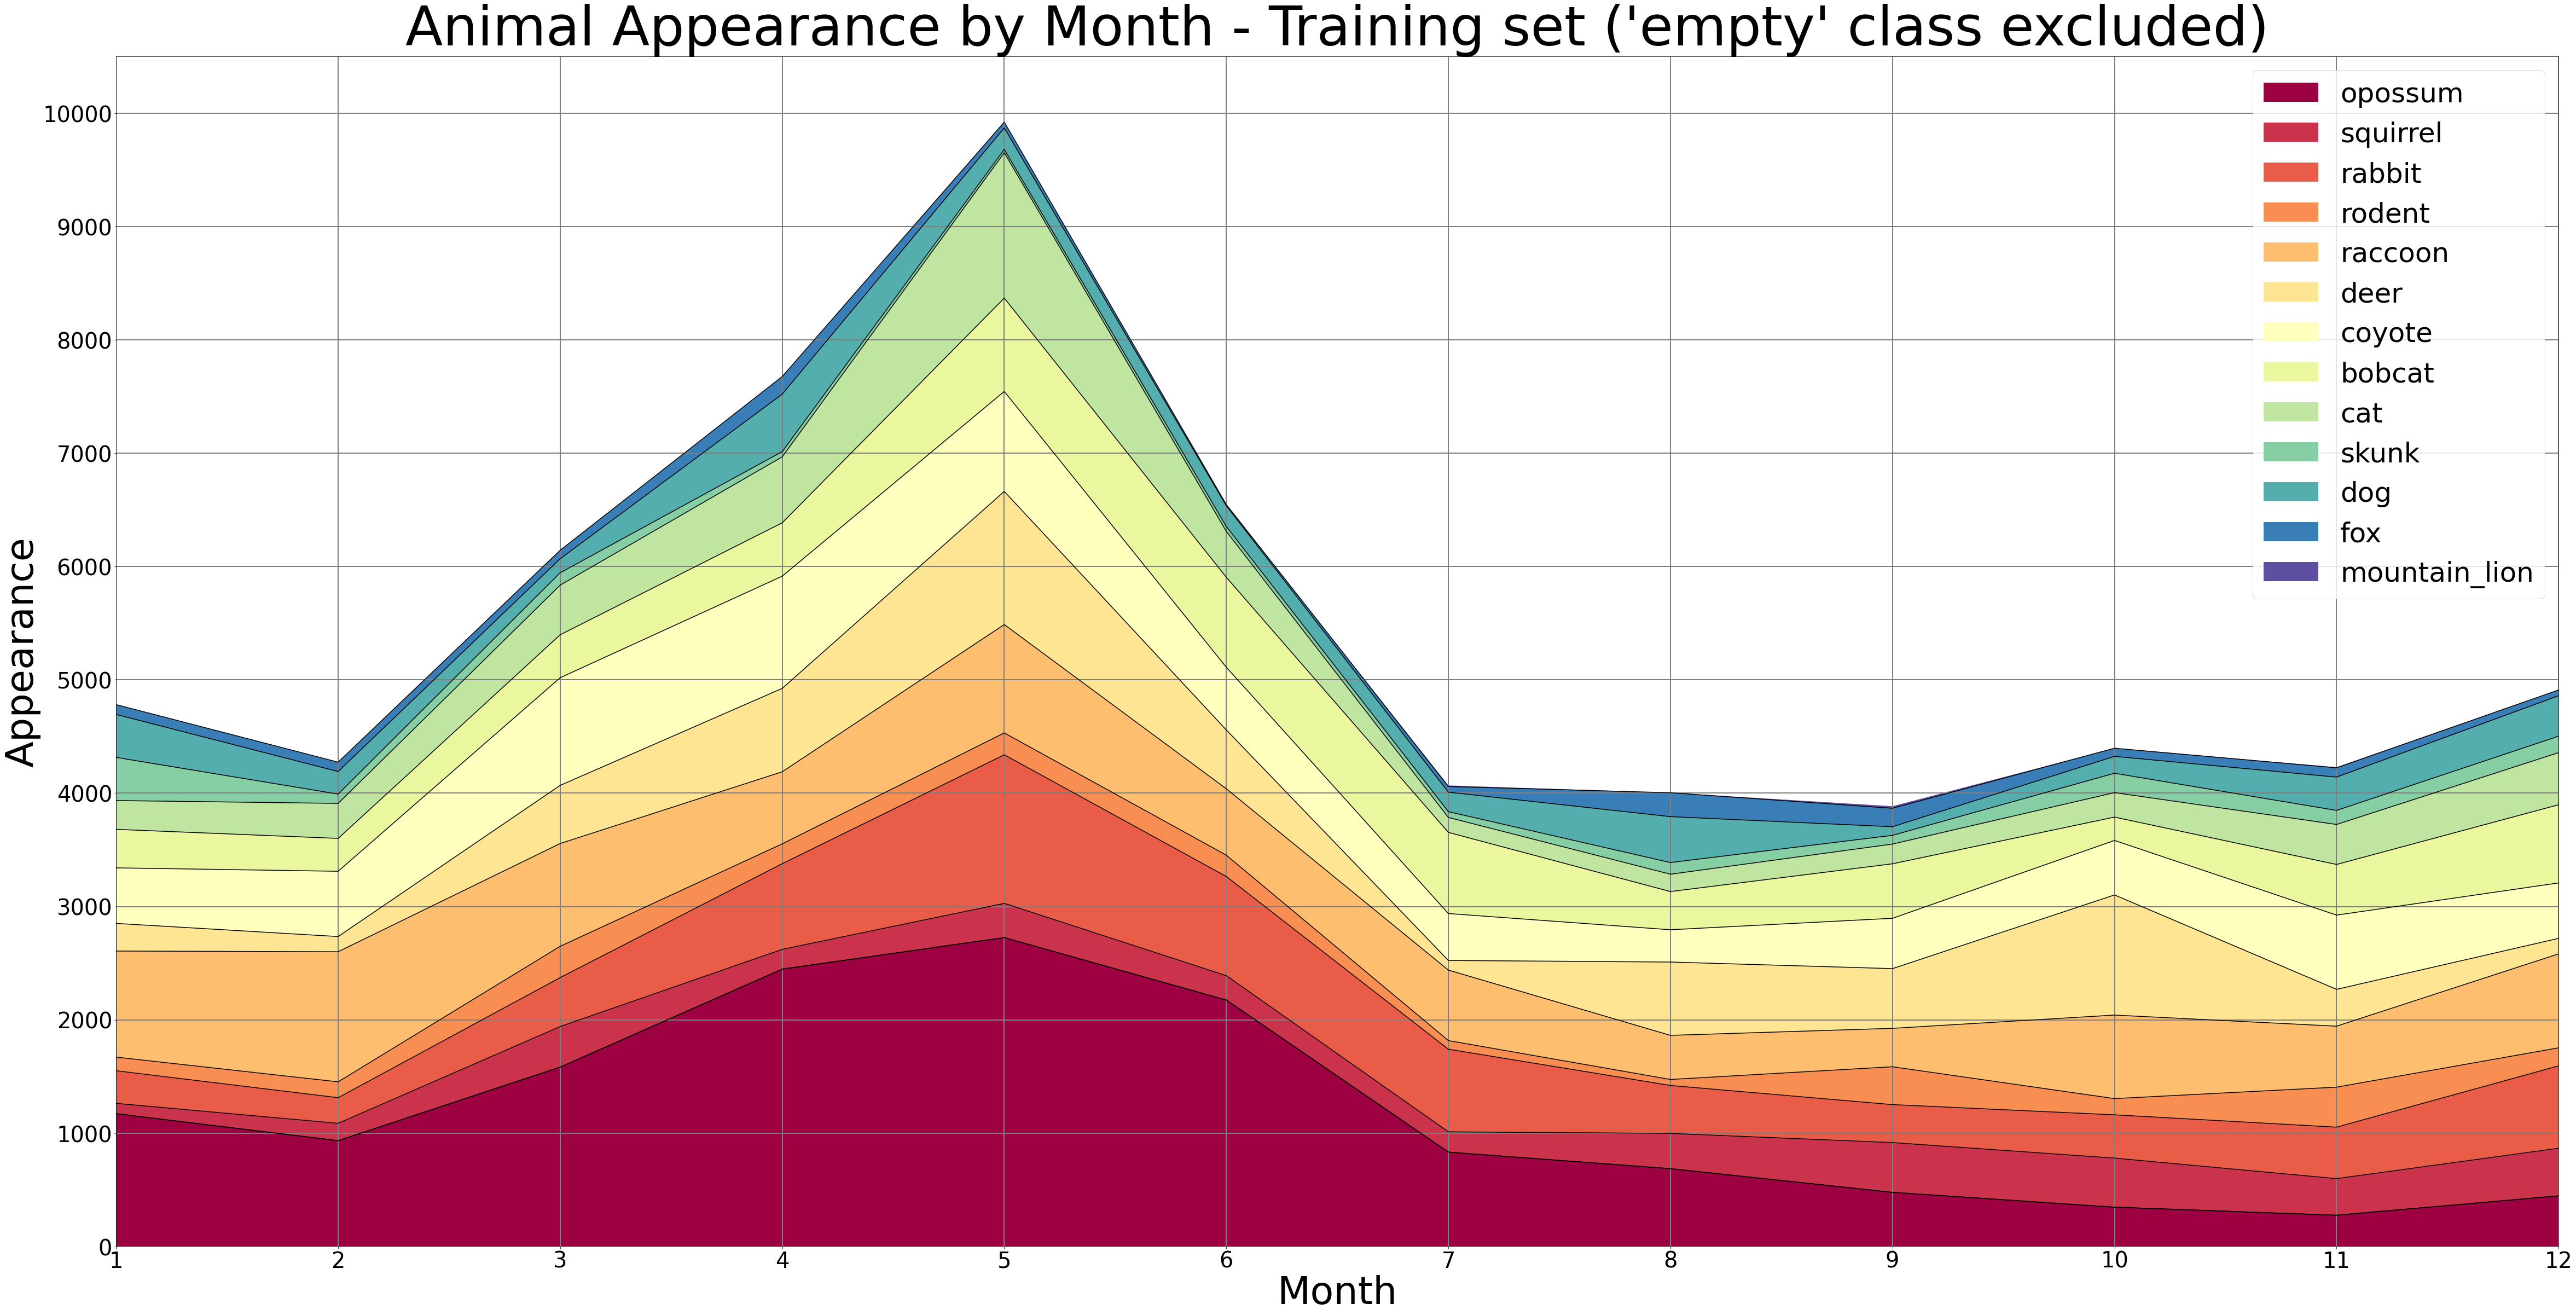

In [9]:
fig = plt.figure(figsize = (80, 40))
ax1 = fig.add_subplot(111)

x = np.arange(1, 13)
y = np.stack(appearance['cum_app_list'].values)

print(len(x))
print(y.shape)

plt.rcParams["axes.prop_cycle"] = \
                    plt.cycler("color", plt.cm.Spectral(np.linspace(0, 1, 13)))

for i in range(12):
  if i == 0:
    ax1.fill_between(x, 0, y[:, i])
    ax1.plot(x, y[:, i], 'k', label='_nolegend_')

  ax1.fill_between(x, y[:, i], y[:, i+1])
  ax1.plot(x, y[:, i], 'k', label='_nolegend_')
  
ax1.set_title("Animal Appearance by Month - Training set ('empty' class excluded)", size = 100)
ax1.set_ylabel("Appearance", size = 70)
ax1.set_xlabel("Month", size = 70)

decodedClassNums = list(decoder.values())
legendNames = [CLASSES[k] for k in decodedClassNums]
ax1.legend(legendNames, prop={'size': 50})

ax1.autoscale(tight=True)
ax1.grid(visible = True, which = 'both', color = 'tab:gray', linewidth = 2)
ax1.tick_params(axis='both', which='major', labelsize = 40)
ax1.set_ylim((0, 10500))
ax1.xaxis.set_ticks(np.arange(1, 13, 1))
ax1.yaxis.set_ticks(np.arange(0, 11000, 1e3))

plt.show()
